# Stock Prices Prediction Using Keras Long Term Short Memory

In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Mounting the google colab drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the training set
dataset_train = pd.read_csv('/content/drive/MyDrive/LSTM/NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
dataset_train.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
dataset_train.shape

(2035, 8)

In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
dataset_train.shape

(2035, 8)

In [8]:
training_set_scaled.shape

(2035, 1)

In [10]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
dataset_train.shape

(2035, 8)

In [12]:
X_train.shape

(1975, 60)

In [13]:
X_train.shape[0]

1975

In [14]:
X_train.shape[1]

60

In [15]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [16]:
X_train.shape

(1975, 60, 1)

In [17]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [18]:
input_shape = (X_train.shape[1], 1)

In [19]:
input_shape

(60, 1)

In [20]:
X_train.shape[1]

60

In [21]:
# Initialising the RNN
regressor = Sequential()
# units : 50, 100, 200, 256, 512, 1024
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))


In [ ]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)



Epoch 1/10
62/62 [==============================] - 16s 136ms/step - loss: 0.0089
Epoch 2/10
62/62 [==============================] - 8s 130ms/step - loss: 0.0040
Epoch 3/10
62/62 [==============================] - 8s 132ms/step - loss: 0.0038
Epoch 4/10
62/62 [==============================] - 8s 123ms/step - loss: 0.0027
Epoch 5/10
62/62 [==============================] - 7s 115ms/step - loss: 0.0022
Epoch 6/10
62/62 [==============================] - 7s 116ms/step - loss: 0.0023
Epoch 7/10
62/62 [==============================] - 8s 122ms/step - loss: 0.0019
Epoch 8/10
62/62 [==============================] - 7s 120ms/step - loss: 0.0019
Epoch 9/10
62/62 [==============================] - 7s 118ms/step - loss: 0.0017
Epoch 10/10
62/62 [==============================] - 7s 115ms/step - loss: 0.0016


In [ ]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/drive/MyDrive/LSTM/tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_test.shape

(16, 8)

In [ ]:
real_stock_price

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

In [ ]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

In [ ]:
dataset_total

0     234.05
1     234.55
2     240.00
3     233.30
4     233.55
       ...  
11    208.00
12    217.00
13    223.50
14    230.00
15    234.55
Name: Open, Length: 2051, dtype: float64

In [ ]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [ ]:
len(inputs)

76

In [ ]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])

In [ ]:
len(X_test)

16

In [ ]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
real_stock_price

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

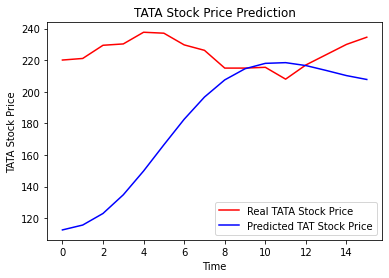

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()